In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
import matplotlib.pyplot as plt          # librairie graphique

# IMPORTANT
---
> Durée de l'épreuve 1h30.<br>
> Les documents, les calculatrices et les téléphones portables sont interdits.<br>
> Toute réponse devra être justifiée.<br>
> Toutes les fonctions que vous proposerez devront contenir des commentaires même succints.
---
> Pour certaines questions théoriques, vous devrez répondre sur votre copie en précisant bien le numéro de la question. Pour les questions numériques, vous devez compléter le notebook.
---
> Lorsque vous aurez terminer l'épreuve, vous devez **sauvegarder votre travail** en cliquant sur la petite disquette en haut à gauche puis **quitter le notebook** en cliquant sur `file` puis `close and halt`.<br>
> Puis vous devez quitter `jupyter-notebook` en retournant dans le `terminal` et en suivant les instructions : `CTRL+C` suivi de `y`.

# Partie A: modèles dynamiques et schémas pour EDOs

On cherche à étudier un modèle simple d’interaction entre deux protéines, X et Y, où la protéine X inhibe la synthèse de son activateur Y. On s’intéresse à l’évolution au cours du temps des concentrations $ x(t) $ et $ y(t) $ des protéines X et Y respectivement.

**Exercice 1.** (1 pts)

On suppose qu'à chaque instant la protéine X est dégradée par des protéases. La vitesse de dégradation à l'instant $ t $ est proportionnelle à la concentration de la protéine $ x(t) $ et à une constante $ k_d $.
> 1. Ecrire l'équation différentielle satisfaite par $ x $. Comment s'appèlle se type de modèle en dynamique de populations? Donner la solution de cette équation en terme de $ k_d $ et de $ x( 0 ) $, la concentration initiale de la protéine X.

**Réponse**

La fonction $x$ vérifie l'équation différentielle
$$ x'(t) = - k_d x(t), \quad t>0. $$
Ce modèle s'appelle le modèle exponentielle (modèle de Malthus) et la solution est donnée par
$$ x(t) = x(0) \exp(-k_d t), \quad t\geq 0. $$

**Exercice 2.** (3 pts)

On suppose maintenant que la protéine X est synthétisée à une vitesse constante $ k_0 $ et donc la concentration $ x $ est décrite par le problème de Cauchy suivant:
\begin{equation*}
\left\lbrace
\begin{aligned} 
& x'( t ) = k_0 - k_d x( t ), && t>0,\\
& x( 0 ) = x_0. 
\end{aligned} \right. \qquad ( P_X )
\end{equation*}

> 1. Vérifier que la fonction $ x_{ex}: t \mapsto \frac{k_0}{k_d} + \bigl( x_0 - \frac{k_0}{k_d} \bigr) e^{ - k_d t } $ est la solution exacte de $ (P_X) $.


**Réponse**

On vérifie la condition initiale :
$$ x_{ex}(0) = \frac{k_0}{k_d} + x_0 - \frac{k_0}{k_d} = x_0.$$
La fonction $x_{ex}$ est de classe $\mathcal{C}^\infty$, on peut donc la dériver : 
$$
x'_{ex}(t) = -k_d \bigl( x_0 - \frac{k_0}{k_d} \bigr) e^{ - k_d t } = k_0 - k_d x_{ex}(t).
$$
La fonction $x_{ex}$ est donc bien la solution de $(P_X)$.

Dans la suite de cet exercice, on supposera que $ k_0 = 6 $ (par minute), $ k_d = 5 $ (par minute et par mole de X).

> 2. Proposez une fonction `sol_exacte` qui prend en argument un tableau `t` et un nombre `x0` et retourne l'évaluation de la fonction $ x_{ex} $ aux points `t`.  Représentez graphiquement cette fonction pour $x_0 = 1$
 sur l'intervalle $[0,T]$ avec $T=16$. 


In [53]:
def sol_exacte(t, x0):
    """solution exacte"""
    ## COMPLETEZ
   
    return k0/kd + (-k0/kd + x0) * np.exp(-kd*t)

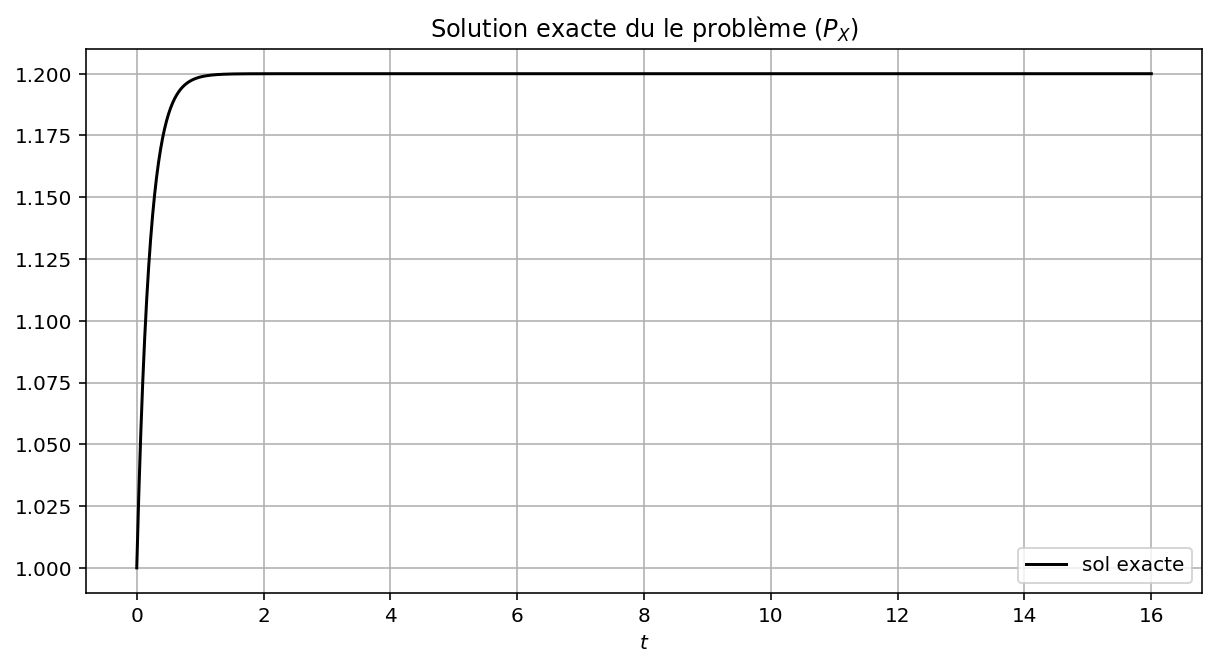

In [55]:
k0 = 6
kd = 5
T = 16
x0 = 1

# COMPLETEZ  


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

tt = np.linspace(0, T, 1025)
sol_ex = sol_exacte(tt, x0)

ax.plot(tt, sol_ex, color='k', label='sol exacte')
ax.set_title(r"Solution exacte du le problème ($P_X$)")
ax.set_xlabel(r"$t$")
ax.legend()
plt.grid()
plt.show()


**Exercice 2** (3 pts) 

Considérons le problème de Cauchy
\begin{equation*}\left\lbrace
\begin{aligned}
& x'( t ) = f( t, x( t ) ), &&t>0,\\
& x( 0 ) = x_0.
\end{aligned}\right.
\end{equation*}
Le *theta-schéma* consiste à construire la suite $ x^n $ des valeurs approchées de $ x( t^n ) $, $ n = 0, 1, \ldots, N $, via les relations suivantes, où $\theta \in [0,1]$:

\begin{equation*}
x^0 = x_0, \quad x^{ n+1 } = x^n + \Delta t \left( (1 - \theta)  f( t^{ n }, x^{ n } ) + \theta f( t^{ n+1 }, x^{ n+1 } )\right). \quad (S_{\theta}) 
\end{equation*}
> 1. Pour quelle valeur de $\theta$ a-t-on la méthode d'Euler explicite ?
> 2. Pour quelle valeur de $\theta$ a-t-on la méthode d'Euler implicite définie par :
\begin{equation*}
x^0 = x_0, \quad x^{ n+1 } = x^n + \Delta t f( t^{ n+1 }, x^{ n+1 } ).\quad (E_{impl})
\end{equation*}
> 3. Pour la fonction $ f $ définie par $ f( t, x ) = k_0 - k_d x $ écrivez la relation qui donne $x^{n+1}$ en fonction de $x^n$ pour le theta-schéma $(S_{\theta})$.
> 4. Programmez la méthode *theta-schema* afin de calculer la solution approchée du problème de Cauchy $(P_X)$. On écrira une fonction `theta_schema` qui prend en argument un nombre `x0` (la valeur initiale de la concentration), un nombre `T` (la longueur de l'intervalle de temps), un nombre $ N $ (le nombre de points), 
et un nombre `theta` (dans l'intervalle $[0,1]$), et qui retourne deux tableaux : `t`, constitué des instants $ 0, \Delta t, 2 \Delta t, \ldots, N \Delta t $, avec $ \Delta t = T / N $, et `x`, constitué des valeurs de la solution approchée en ces instants.
> 5. Pour chacune des méthodes d'Euler explicite et d'Euler implicite, tracez sur un même graphique, la solution exacte et les solutions approchées du problème $(P_X)$ pour les valeurs du pas de temps $\Delta t = 0.15,\, 0.39,\,  0.4, \,  0.41$. 
Commentez le graphique obtenu. Pour trouver une solution approchée de $(P_X)$ quelle méthode numérique choisiriez-vous ? Expliquez votre choix.
> 6. Lorsque $\theta = \frac{1}{2}$  le schéma $(S_{\theta})$ est appelé schéma de *Crank-Nicolson*. Pour deux des valeurs de $\Delta t$ ci-dessus, representez sur un même graphique, la solution exacte, 
et les solutions approchées obtenues par le schéma de Crank-Nicolson et votre schéma choisi de la question 5. ci-dessus. Quel schéma preferez-vous ?  


**Réponse**

1. Pour $ \theta = 0 $.
2. Pour $ \theta = 1 $.
3. On a 
$$
x^{ n+1 } = x^n + \Delta t ( ( 1 - \theta ) ( k_0 - k_d x^n ) + \theta ( k_0 - k_d x^{ n+1 } ) ) =
x^n - ( 1 - \theta ) \Delta t k_d x^n - \theta k_d \Delta t x^{ n+1 } + \Delta t k_0,
$$
ainsi
$$ x^{ n+1 } = \frac{ ( 1 - ( 1 - \theta ) \Delta t k_d ) x^n + \Delta t k_0 }{ 1 + \theta k_d \Delta t } $$
5. On voit que, dans le cas du schéma d'Euler explicite, pour des valeurs de $ \Delta t $ pas assez petites la solution numérique n'est pas proche de la solution exacte, et peut meme s'eloigner de plus en plus de la solution exacte au cours de temps. Ce comportement n'est pas observé pour le schéma d'Euler implicite. Pour la résolution du problème considéré on choisirait donc le schéma d'Euler implicite. 
6. Pour les deux valeurs de $ \Delta t $ choisies l'erreur globale correspondant au schéma de Crank-Nicolson est inférieure à celle qui correspond au schéma d'Euler implicite, donc le schéma de Crank-Nicolson semble etre préférable pour le problème considéré.

In [57]:
def theta_schema(x0, T, N, theta):
    """
    theta schéma 
    
    Parameters
    ----------
    
    x0: float
        donnée initiale
    T: float
        instant final
    N: int
        nombre de pas de temps
    theta: float
       nombre identifiant le schéma; Il est compris entre 0 et 1 et peut prendre ces valeurs   
        
    Returns
    -------
    
    t: ndarray
        les instants où la solution approchée est calculée
    x: ndarray
        les valeurs de la solution approchée par le schéma d'Euler implicite
    """
    
    ## COMPLETEZ 
    
    t = np.zeros((N+1,))
    y = np.zeros((N+1,))
    t[0], y[0] = 0, x0
    dt = T/N
    for n in range(N):
        t[n+1] = t[n] + dt
        y[n+1] = ( (1 - (1-theta)* kd *dt ) * y[n] + dt * k0 ) / (1 + theta * kd * dt)
        
    return (t, y)


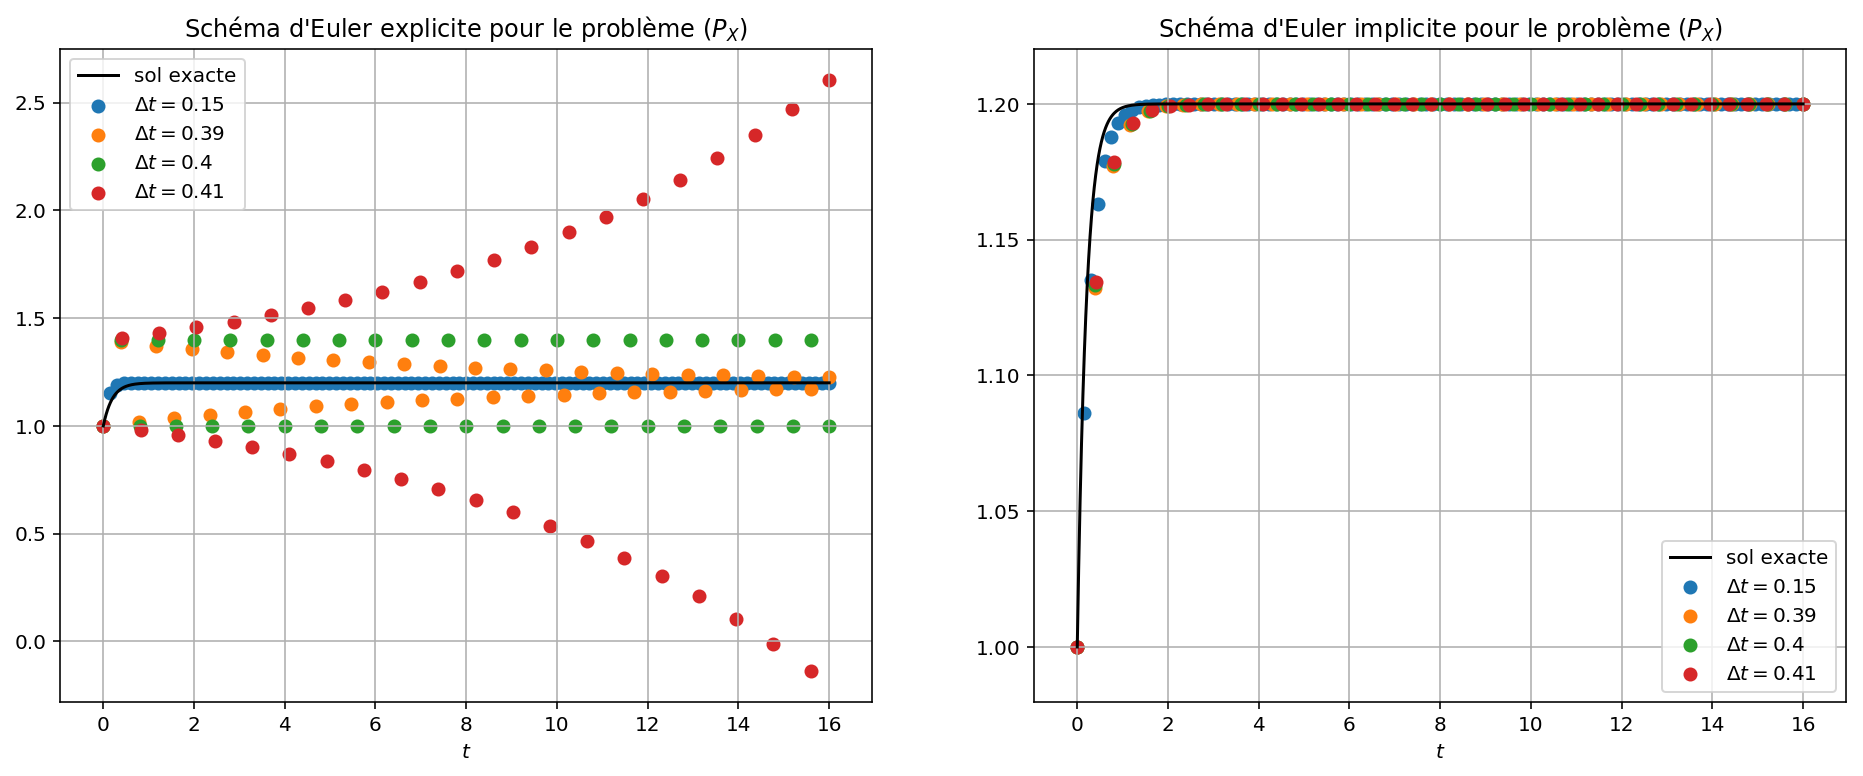

In [58]:
## COMPLETEZ 

k0 = 6
kd = 5
delta_ts = [0.15, 0.39, 0.4, 0.41]
T = 16
Ns = [int(T / delta_t) for delta_t in delta_ts]
x0 = 1

fig = plt.figure(figsize=(16, 6))

# Schéma d'Euler explicite  obten lorsque  theta = 0
ax = fig.add_subplot(1, 2, 1)

for N in Ns:
    t, sol_appr = theta_schema(x0, T, N, 0)
    #ax.scatter(t, sol_appr, label = f'$\Delta t={T/N:.2}$')
    ax.scatter(t, sol_appr, label = '$\Delta t={:.2}$'.format(T/N))

tt = np.linspace(min(t), max(t), 1025)
sol_ex = sol_exacte(tt, x0)
ax.plot(tt, sol_ex, color='k', label='sol exacte')
ax.set_title(r"Schéma d'Euler explicite pour le problème ($P_X$)")
ax.set_xlabel(r"$t$")
ax.legend()
ax.grid()

# Schéma d'Euler implicite  obtenu lorsque theta = 1

ax = fig.add_subplot(1, 2, 2)
for N in Ns:
    t, sol_appr = theta_schema(x0, T, N, 1)
    #ax.scatter(t, sol_appr, label = f'$\Delta t={T/N:.2}$')
    ax.scatter(t, sol_appr, label = '$\Delta t={:.2}$'.format(T/N))

tt = np.linspace(min(t), max(t), 1025)
sol_ex = sol_exacte(tt, x0)
ax.plot(tt, sol_ex, color='k', label='sol exacte')
ax.set_title(r"Schéma d'Euler implicite pour le problème ($P_X$)")
ax.set_xlabel(r"$t$")
ax.legend()
ax.grid()


plt.show()

Delat_t = 4.00e-01  :  Erreur Euler Implicite : 3.959961002e-02
Delat_t = 4.00e-01  :  Erreur Crank-Nicolson  : 2.706705665e-02
Delat_t = 1.50e-01  :  Erreur Euler Implicite : 2.074847484e-02
Delat_t = 1.50e-01  :  Erreur Crank-NiColson  : 3.617772182e-03


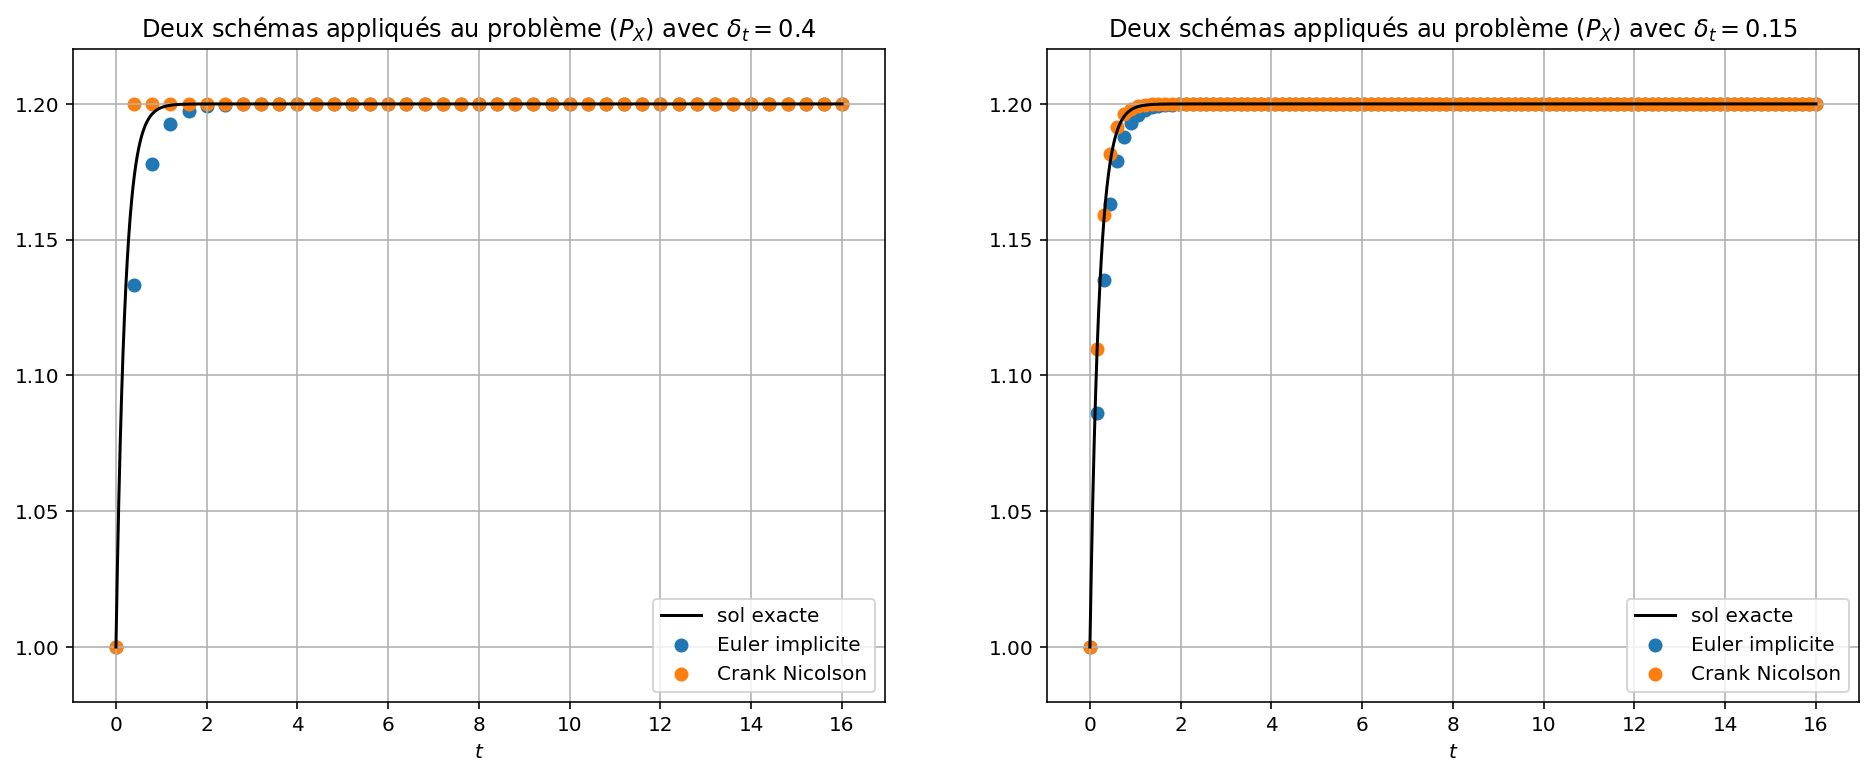

In [83]:
        
fig = plt.figure(figsize=(16, 6))


delta_t = 0.4   # un pas grossier pour lequel le Euler explicite avait du mal
N = int(T/delta_t)


ax = fig.add_subplot(1, 2, 1)
#Schéma d'Euler implicite  obtenu lorsque  theta = 1 (schéma selectionné à la question 5)
t, sol_appr_euler_implicite = theta_schema(x0, T, N, 1)
#Schéma de Crank Nicolson obtenu lorsque  theta = 1/2 
t, sol_appr_crank_nicolson = theta_schema(x0, T, N, 0.5)

ax.scatter(t, sol_appr_euler_implicite, label='Euler implicite')
ax.scatter(t, sol_appr_crank_nicolson, label='Crank Nicolson')

tt = np.linspace(min(t), max(t), 1025)
sol_ex = sol_exacte(tt, x0)
ax.plot(tt, sol_ex, color='k', label='sol exacte')
ax.set_title(r"Deux schémas appliqués au problème ($P_X$) avec $\delta_t ={:.2}$".format(delta_t))
ax.set_xlabel(r"$t$")
ax.grid()
ax.legend()

err_implicite = np.max(np.abs(sol_appr_euler_implicite - sol_exacte(t, x0)))
err_crank_nicolson = np.max(np.abs(sol_appr_crank_nicolson - sol_exacte(t, x0)))

print("Delat_t = {:3.2e}  :  Erreur Euler Implicite : {:10.9e}".format(delta_t, err_implicite))
print("Delat_t = {:3.2e}  :  Erreur Crank-Nicolson  : {:10.9e}".format(delta_t, err_crank_nicolson))



delta_t = 0.15   # un pas pour lequel la Euler implicite se comporte bien
N = int(T/delta_t)

ax = fig.add_subplot(1, 2, 2)
#Schéma d'Euler implicite  obtenu lorsque  theta = 1 (schéma selectionné à la question 5)
t, sol_appr_euler_implicite = theta_schema(x0, T, N, 1)
#Schéma de Crank Nicolson obtenu lorsque  theta = 1/2 
t, sol_appr_crank_nicolson = theta_schema(x0, T, N, 0.5)

ax.scatter(t, sol_appr_euler_implicite, label='Euler implicite')
ax.scatter(t, sol_appr_crank_nicolson, label='Crank Nicolson')

tt = np.linspace(min(t), max(t), 1025)
sol_ex = sol_exacte(tt, x0)
ax.plot(tt, sol_ex, color='k', label='sol exacte')
ax.set_title(r"Deux schémas appliqués au problème ($P_X$) avec $\delta_t ={:.2}$".format(delta_t))
ax.set_xlabel(r"$t$")
ax.legend()
ax.grid()

err_implicite = np.max(np.abs(sol_appr_euler_implicite - sol_exacte(t, x0)))
err_crank_nicolson = np.max(np.abs(sol_appr_crank_nicolson - sol_exacte(t, x0)))
print("Delat_t = {:3.2e}  :  Erreur Euler Implicite : {:10.9e}".format(delta_t, err_implicite))
print("Delat_t = {:3.2e}  :  Erreur Crank-NiColson  : {:10.9e}".format(delta_t, err_crank_nicolson))



# Partie B: interpolation

**Exercice 1.** (3,5 pts)

Soit $ f( x ) = e^{ -x / 3 } $.
1. Calculez le polynome interpolateur de Lagrange $ P $ pour la fonction $ f $ aux points $ x_1 = 0, x_2 = 1/2, x_3 = 1 $ (trouvez son expression dans la base canonique).
2. Soit $ L_i $, $ i = 1, 2, 3 $, les polynomes de Lagrange associés aux points $ x_1, x_2, x_3 $. Montrer que $ L_1( x ) = 2 x^2 - 3 x + 1 $. Donnez des expressions explicites pour $ L_1 $ et $ L_3 $.
3. Donnez une expression de $ P $ en termes de $ L_1 $, $ L_2 $, $ L_3 $.
4. Montrez que l'erreur d'approximation de $ f $ par $ P $ sur $ [ 0, 1 ] $ est majorée par $ \frac{ 1 }{ 162 } $. Déduisez de la question précédente que $ P $ peut servir pour calculer la valeur de $ f $ sur l'intervalle $ [ 0, 1 ] $ avec la précision de $ 2 $ chiffres après la virgule.

**Réponse**

1. On remarque tout d'abord que le degré de $ P $ est $ 2 $, donc $ P( X ) = a X^2 + b X + c $. Le polynome interpolateur vérifie $ P( x_j ) = f( x_j ) $, $ j = 1, 2, 3 $. Ainsi $ P( 0 ) = c = 1 $, et donc $ P\left( 1/2 \right) = \frac{ 1 }{ 4 } a + \frac{ 1 }{ 2 } b + 1 = e^{ -1/6 } $, $ P( 1 ) = a + b + 1 = e^{ -1/3 } $.
En resolvant les deux dernières équations par rapport à $ a $, $ b $, on obtient que $ a = - 4e^{ -1/6 } + 2 e^{ - 1/3 } + 2 $, $ b = - e^{ -1/3 } + 4 e^{ - 1/6 } - 3 $. Donc 
$$ P( X ) = ( - 4e^{ -1/6 } + 2 e^{ - 1/3 } + 2 ) X^2 + ( - e^{ -1/3 } + 4 e^{ - 1/6 } - 3 ) X + 1. $$

2. 
$$ L_1( x ) = \prod_{ j \neq 1 } \frac{ x - x_j }{ x_1 - x_j } = \frac{ ( x - x_2 ) ( x - x_3 ) }{ ( x_1 - x_2 )( x_1 - x_3 ) } = \frac{ ( x - 1/2 ) ( x - 1 ) }{ ( 0 - 1/2 )( 0 - 1 ) } = 2 x^2 - 3x + 1; $$
$$ L_2( x ) = \prod_{ j \neq 2 } \frac{ x - x_j }{ x_2 - x_j } = \frac{ ( x - x_1 ) ( x - x_3 ) }{ ( x_2 - x_1 )( x_2 - x_3 ) } = \frac{ ( x - 0 ) ( x - 1 ) }{ ( 1/2 - 0 )( 1/2 - 1 ) } = -4 x^2 + 4x; $$
$$ L_3( x ) = \prod_{ j \neq 3 } \frac{ x - x_j }{ x_3 - x_j } = \frac{ ( x - x_1 ) ( x - x_2 ) }{ ( x_3 - x_1 )( x_3 - x_2 ) } = \frac{ ( x - 0 ) ( x - 1/2 ) }{ ( 1 - 0 )( 1 - 1/2 ) } = 2 x^2 - x. $$

3. $$ P( x ) = \sum_{ j = 1 }^3 f( x_j ) L_j( x ) = 2 x^2 - 3 x + 1 + e^{ -1/6 } ( - 4 x^2 + 4 x ) + e^{ -1/3 } ( 2 x^2 - x ) $$
4. Selon le théorème sur l'erreur d'approximation d'une fonction par son polynome interpolateur
$$ \| P - f \| \leq \frac{ \| f^{ (3) } \| }{ 3! } \| \pi_3 \|. $$ On peut majorer $ \| \pi_3 \| \leq 1 $. Comme $ \left( e^{ -1/3 x } \right)''' = - \frac{ 1 }{ 27 } e^{ -1/3 x } $, on a $ \| P - f \| \leq \frac{ 1 }{ 27 } \cdot \frac{ 1 }{ 6 } = \frac{ 1 }{ 162 } $. Comme $ \frac{ 1 }{ 162 } < \frac{ 1 }{ 100 } $, cela veut dire que $ P $ peut servir pour calculer la valeur de $ f $ sur l'intervalle $ [ 0, 1 ] $ avec la précision de $ 2 $ chiffres après la virgule.

**Exercice 2.**

Dans cet exercice, nous nous intéressons à un autre type d'interpolation : l'interpolation de Hermite.

Nous considérons une fonction $f:[a, b]\to\mathbb{R}$ de classe $\mathcal{C}^1$. Pour les applications numériques, nous prendrons $a=-1$, $b=1$ et 
$$f(x) = \exp(-x^2).$$

Nous commençons par visualiser comment se comporte le polynôme interpolateur de Lagrange lorsque les points d'interpolations se rapprochent les uns des autres (nous rappelons que par définition, ces points sont tous distincts). Nous considérons donc les quatre points d'interpolation
$$
x_1 = a, \quad x_2=a+\delta x, \quad x_3=b-\delta x, \quad x_4=b.
$$
(Ici nous considérons que $\delta x \in]0, (b-a)/2[$ pour assurer que les 4 points sont dans l'intervalle $[a,b]$ et distincts deux à deux.

> 1. En utilisant les fonctions proposées dans la cellule suivante, construisez une fenêtre graphique contenant 4 graphiques, chacun obtenu pour une valeur de $\delta x\in\lbrace 0.5, 0.25, 0.1, 0.01\rbrace$. Sur chaque figure, vous placerez 
>    - la courbe de la fonction $f$ en noir ;
>    - la courbe du polynôme interpolateur de Lagrange aux points $(x_1,f(x_1)), \ldots, (x_4, f(x_4))$ ;
>    - les 4 points d'interpolation avec des symboles orange ;
>    - un titre contenant la valeur du $\delta x$ de la figure.
> 2. Que remarquez-vous sur le comportement du polynôme interpolateur lorsque $\delta x$ devient petit ? 

*Vous pourrez essayer d'obtenir une figure ressemblant à celle-ci :*
![Lagrange](EXO4_Lagrange.png)

In [2]:
def interp_Lagrange_matrice(x):
    """
    retourne la matrice associée au vecteur x
    pour calculer le polynôme interpolateur de Lagrnage
    """
    n = x.size
    M = np.empty((n, n))
    j = np.arange(n)
    for i in range(n):
        M[i, :] = x[i]**j
    return M


def interp_Lagrange_poly(x, y):
    """
    retourne le vecteur des coefficients du polynôme interpolateur
    de Lagrange dans la base canonique
    """
    if x.size != y.size:
        print("Problème de taille dans interp_Lagrange_poly")
        print(f"x.size = {x.size}, y.size={y.size}")
    return np.linalg.solve(interp_Lagrange_matrice(x), y)

def horner(a, xx):
    """
    évalue par l'algorithme de Hörner le polynôme
    dont les coefficients dans la base canonique sont stockés dans le vecteur a
    aux points stockés dans le vecteur xx
    """
    yy = 0.
    for ak in a[::-1]:
        yy *= xx
        yy += ak
    return yy

def interp_Lagrange(x, y, xx):
    """
    calcule et évalue le polynôme interpolateur de Lagrange
    en utilisant son écriture dans la base canonique
    
    Parameters
    ----------
    
    x: ndarray
        abscisses des points d'interpolation
        
    y: ndarray
        ordonnées des points d'interpolation
        
    xx: ndarray
        abscisses des points d'évaluation
        
    Returns
    -------
    
    ndarray
        ordonnées des points d'évaluation
    """
    a = interp_Lagrange_poly(x, y)
    return horner(a, xx)

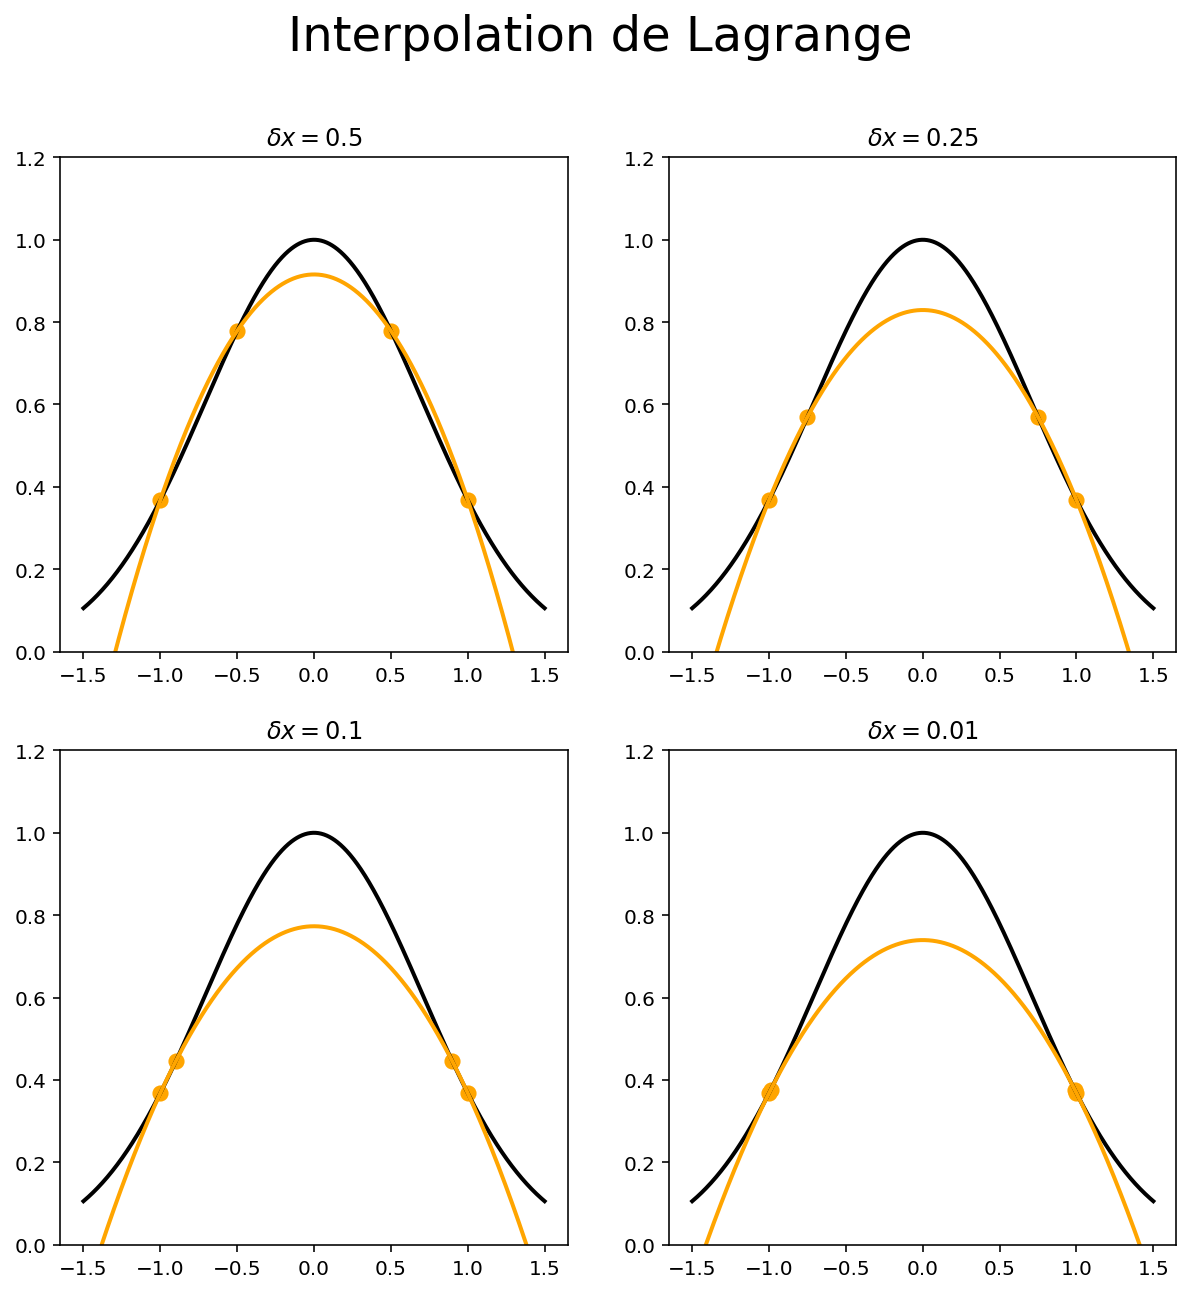

In [3]:
f = lambda x: np.exp(-x**2)
a, b = -1, 1
xmin, xmax = a-.25*(b-a), b+.25*(b-a)
xx = np.linspace(xmin, xmax, 1025)

fig = plt.figure(figsize=(10, 10))

vdx = [0.5, 0.25, 0.1, 0.01]
for k, dx in enumerate(vdx):
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(xx, f(xx), linewidth=2, color='black')
    ax.set_ylim(0, 1.2)
    ax.set_title(f"$\delta x={dx}$")
    x = np.array([a, a+dx, b-dx, b])
    y = f(x)
    yy = interp_Lagrange(x, y, xx)
    ax.scatter(x, y, color='orange', s=50)
    ax.plot(xx, yy, color='orange', linewidth=2)
fig.suptitle("Interpolation de Lagrange", fontsize=24)
fig.savefig("EXO4_Lagrange.png")

**Réponse**
Lorsque $ \delta x $ devient petit, le polynome interpolateur approche moins bien la fonction interpolée.

L'interpolation de Hermite consiste, étant donnés
* $N$ un nombre entier supérieur à 1,
* $(x_1,\ldots, x_N)$ $N$ réels deux à deux distincts,
* $(y_1, \ldots, y_N)$ $N$ réels,
* $(z_1, \ldots, z_N)$ $N$ réels,

à déterminer l'unique polynôme $P\in\mathbb{R}_{2N-1}[X]$ qui vérifie
$$P(x_i) = y_i, \quad P'(x_i)=z_i, \quad 1\leq i\leq N.$$

On dira que polynôme $P$ est le polynôme interpolateur de Hermite aux points $(x_1,\ldots,x_N)$ de la fonction $f$ s'il vérifie
$$ P\in\mathbb{R}_{2N-1}[X], \quad P(x_i)=f(x_i), \quad P'(x_i)=f'(x_i), \quad 1\leq i\leq N.$$

> 3. Montrez que si l'on écrit $P$ le polynôme interpolateur de Hermite de la fonction $f$ dans la base canonique sous la forme
$$ P = \sum_{j=0}^{2N-1} a_j X^j,$$
>    le vecteur des coefficients $a = (a_0, \ldots, a_{2N-1})$ est solution du système linéaire de taille $2N\times 2N$
$$
\begin{pmatrix}
x_1^0 & x_1^1 & x_1^2 &\ldots & x_1^{2N-2} & x_1^{2N-1} \\
x_2^0 & x_2^1 & x_2^2 & \ldots & x_2^{2N-2} & x_2^{2N-1} \\
\vdots& \vdots& \vdots&        & \vdots     & \vdots     \\
x_N^0 & x_N^1 & x_N^2 & \ldots & x_N^{2N-2} & x_N^{2N-1} \\
0 & x_1^0 & 2x_1^1 & \ldots & (2N-2) x_1^{2N-3} & (2N-1) x_1^{2N-2} \\
0 & x_2^0 & 2x_2^1 & \ldots & (2N-2) x_2^{2N-3} & (2N-1) x_2^{2N-2} \\
\vdots& \vdots& \vdots&        & \vdots     & \vdots     \\
0 & x_N^0 & 2x_N^1 & \ldots & (2N-2) x_N^{2N-3} & (2N-1) x_N^{2N-2}
\end{pmatrix} \begin{pmatrix}
a_0 \\ a_1 \\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ a_{2N-2} \\ a_{2N-1}
\end{pmatrix} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_N \\ z_1 \\ z_2 \\ \vdots \\ z_N
\end{pmatrix}.
$$

> 4. Proposez une fonction `interp_Hermite` sur le même modèle que la fonction `interp_Lagrange` qui prend en arguments `x`, `y` et `z` trois `ndarray` et `xx` un `ndarray` et qui retourne `yy` un `ndarray` construit comme l'évaluation aux points `xx` du polynôme interpolateur de Hermite associés aux points `x`, `y` et `z`.
> 5. Reprennez la question 1. et ajoutez sur les 4 graphiques l'interpolée de Hermite obtenue. Comment pouvez-vous comparer le polynôme interpolateur de Lagrange et celui de Hermite ?

**Réponse**
3. Cela découle du fait que $ P'( X ) = \sum_{ j = 0 }^{ 2N - 1 } j a_j X^j $.

In [16]:
def interp_Hermite_matrice(x):
    """
    retourne la matrice associée au vecteur x 
    pour calculer le polynôme interpolateur de Hermite
    """
    n = x.size
    M = np.zeros((2*n, 2*n))
    j = np.arange(2*n)
    for i in range(n):
        M[i, :] = x[i]**j
    for i in range(n):
        M[n+i, 1:] = j[1:] * x[i]**(j[1:]-1)
    return M


def interp_Hermite_poly(x, y, z):
    """
    retourne le vecteur des coefficients du polynôme interpolateur
    de Hermite dans la base canonique
    """
    if x.size != y.size or x.size != z.size:
        print("Problème de taille dans interp_Hermite_poly")
        print(f"x.size = {x.size}, y.size={y.size}, z.size={z.size}")
    return np.linalg.solve(interp_Hermite_matrice(x), np.concatenate((y, z)))

def horner(a, xx):
    """
    évalue par l'algorithme de Hörner le polynôme
    dont les coefficients dans la base canonique sont stockés dans le vecteur a
    aux points stockés dans le vecteur xx
    """
    yy = 0.
    for ak in a[::-1]:
        yy *= xx
        yy += ak
    return yy

def interp_Hermite(x, y, z, xx):
    """
    calcule et évalue le polynôme interpolateur de Hermite
    en utilisant son écriture dans la base canonique
    
    Parameters
    ----------
    
    x: ndarray
        abscisses des points d'interpolation
        
    y: ndarray
        ordonnées des points d'interpolation
        
    z: ndarray
        dérivées des points d'interpolation

    xx: ndarray
        abscisses des points d'évaluation
        
    Returns
    -------
    
    ndarray
        ordonnées des points d'évaluation
    """
    a = interp_Hermite_poly(x, y, z)
    return horner(a, xx)

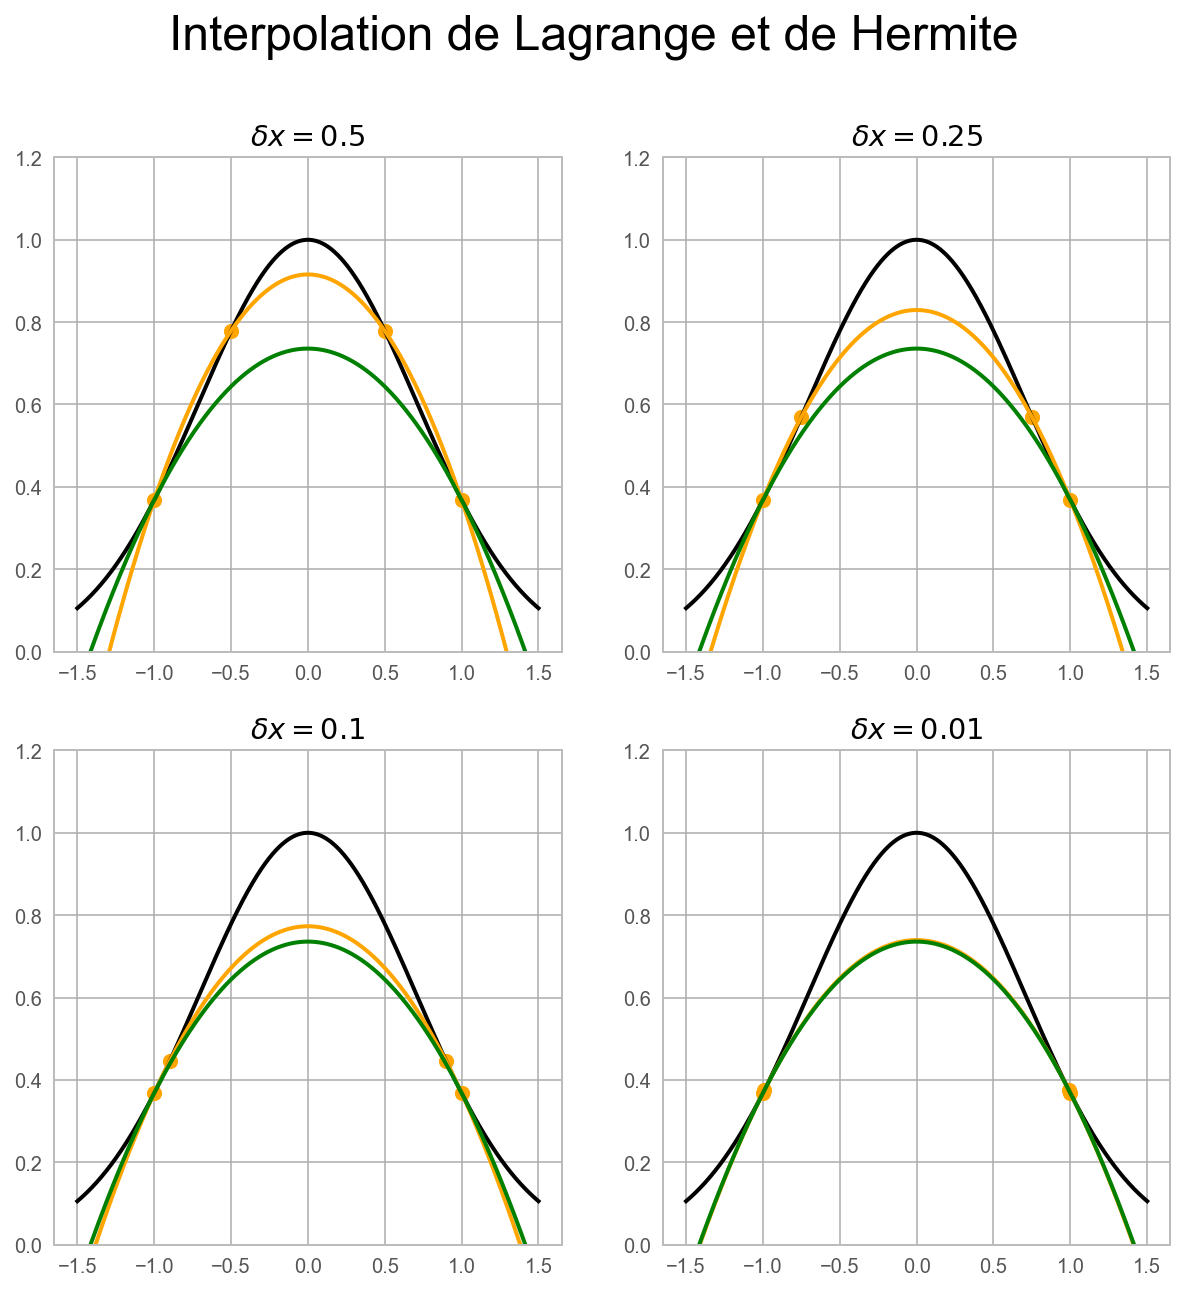

In [18]:
f = lambda x: np.exp(-x**2)
df = lambda x: -2*x*np.exp(-x**2)

a, b = -1, 1
xmin, xmax = a-.25*(b-a), b+.25*(b-a)
xx = np.linspace(xmin, xmax, 1025)

fig = plt.figure(figsize=(10, 10))

x = np.array([a, b])
y, z = f(x), df(x)
yy_h = interp_Hermite(x, y, z, xx)    

vdx = [0.5, 0.25, 0.1, 0.01]
for k, dx in enumerate(vdx):
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(xx, f(xx), linewidth=2, color='black')
    ax.set_ylim(0, 1.2)
    ax.set_title(f"$\delta x={dx}$")
    x = np.array([a, a+dx, b-dx, b])
    y = f(x)
    yy = interp_Lagrange(x, y, xx)
    ax.scatter(x, y, color='orange', s=50)
    ax.plot(xx, yy, color='orange', linewidth=2)
    ax.plot(xx, yy_h, color='green', linewidth=2)
fig.suptitle("Interpolation de Lagrange et de Hermite", fontsize=24)
fig.savefig("EXO4_Hermite.png")

**Réponse**
Lorsque $ \delta x $ devient petit le polynome interpolateur de Lagrange aux points $ ( a, a + \delta x, b - \delta x, b ) $ converge vers le polynome interpolateur de Hermite aux points $ ( a, b ) $. 